In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
np.random_state = 42
iris = load_iris()

## Linearly Separable Data

In [100]:
X, y = iris["data"][:, (2, 3)], (iris["target"] == 0).astype(np.int)
X = np.c_[np.ones(X.shape[0]), X]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [101]:
# training perceptron
def train_perceptron(xtrain, ytrain, n_iter):
    w = np.zeros(xtrain.shape[1])

    misclassified_list = []

    for epoch in range(n_iter):
        misclassified_per_epoch = 0
        for index, data in enumerate(xtrain):
            hx = np.dot(data, w)
            ypred = 1 if hx > 0 else 0
            error = ytrain[index] - ypred
            if error != 0:
                misclassified_per_epoch += 1
                w = w + 0.5*error*data
        misclassified_list.append(misclassified_per_epoch)
    return w, misclassified_list

def predict_perceptron(w, x):
    return [1 if data > 0 else 0 for data in np.sign(x@w)]

In [102]:
w, misclassified_list = train_perceptron(xtrain, ytrain, n_iter = 20)
ytrain_pred = predict_perceptron(w, xtrain)
ytest_pred = predict_perceptron(w, xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

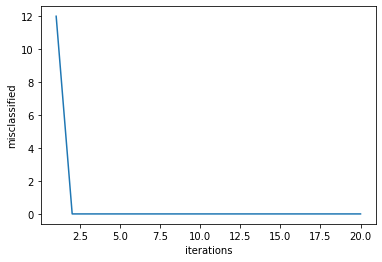

In [103]:
epochs = np.arange(1, n_iter+1)
plt.plot(epochs, misclassified_list)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [104]:
print(f"Train Accuracy : {accuracy_score(ytrain_pred, ytrain)}")
print(f"Test Accuracy : {accuracy_score(ytest_pred, ytest)}")

Train Accuracy : 1.0
Test Accuracy : 1.0


In [105]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter = 20)
perceptron.fit(xtrain, ytrain)
ytrain_pred = perceptron.predict(xtrain)
ytest_pred = perceptron.predict(xtest)

print(f"Train Accuracy : {accuracy_score(ytrain_pred, ytrain)}")
print(f"Test Accuracy : {accuracy_score(ytest_pred, ytest)}")

Train Accuracy : 1.0
Test Accuracy : 1.0


In [106]:
print(f"Scratch Weights : {w}")
print(f"Sklearn Weights : {perceptron.coef_}")

Scratch Weights : [ 3.  -0.8 -1.4]
Sklearn Weights : [[ 3.  -1.9 -1.6]]


## Linearly Non-Separable Data

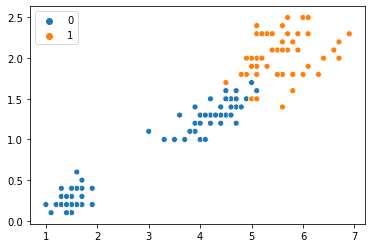

In [93]:
X, y = iris["data"][:, (2, 3)], (iris["target"] == 2).astype(np.int)
X = np.c_[np.ones(X.shape[0]), X]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
sns.scatterplot(x = X[:,1], y = X[:,2], hue = y)

In [94]:
w, misclassified_list = train_perceptron(xtrain, ytrain, n_iter = 20)
ytrain_pred = predict_perceptron(w, xtrain)
ytest_pred = predict_perceptron(w, xtest)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

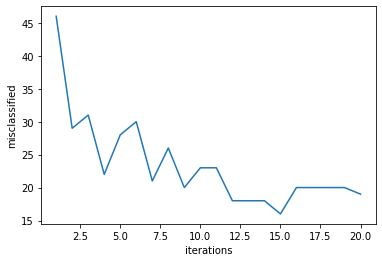

In [95]:
epochs = np.arange(1, n_iter+1)
plt.plot(epochs, misclassified_list)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [96]:
print(f"Train Accuracy : {accuracy_score(ytrain_pred, ytrain)}")
print(f"Test Accuracy : {accuracy_score(ytest_pred, ytest)}")

Train Accuracy : 0.85
Test Accuracy : 0.8


In [97]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter = 20)
perceptron.fit(xtrain, ytrain)
ytrain_pred = perceptron.predict(xtrain)
ytest_pred = perceptron.predict(xtest)

print(f"Train Accuracy : {accuracy_score(ytrain_pred, ytrain)}")
print(f"Test Accuracy : {accuracy_score(ytest_pred, ytest)}")

Train Accuracy : 0.7833333333333333
Test Accuracy : 0.8


In [98]:
print(f"Scratch Weights : {w}")
print(f"Sklearn Weights : {perceptron.coef_}")

Scratch Weights : [-31.     1.75  17.9 ]
Sklearn Weights : [[-35.    3.1  24. ]]
